### import pandas as pd
df=pd.read_csv(r"C:\Users\waj12\Downloads\1000_Companies.csv")
print(df.head())

In [67]:
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


duplicates: 2
     R&D Spend  Administration  Marketing Spend       State       Profit
335    84533.0     122941.3141      231885.6935  California  121248.7116
755    84533.0     122941.3141      231885.6935  California  121248.7116


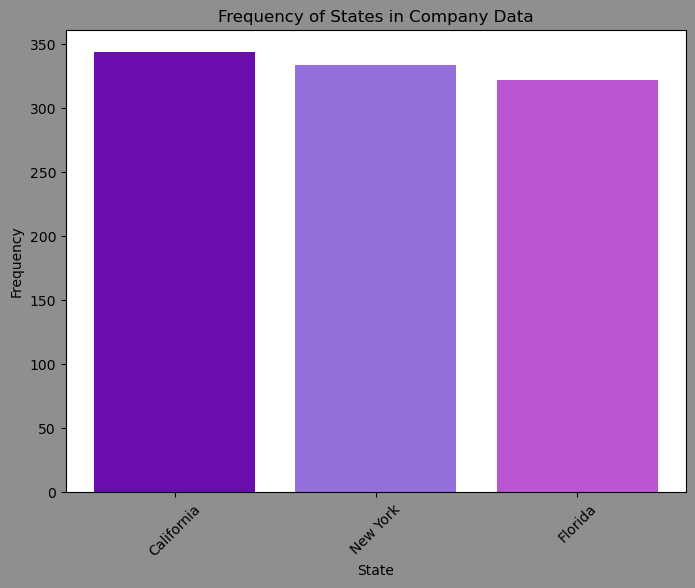

In [69]:
import matplotlib.pyplot as plt

# التحقق من الصفوف المتكررة في الجدول بالكامل
duplicate_rows = df.duplicated(keep=False)
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print(f"duplicates: {num_duplicates}")
    print(df[duplicate_rows])
else:
    print("no duplicates.")

# حساب تكرار كل ولاية (State) في البيانات
state_counts = df["State"].value_counts()

# إعداد الرسم البياني
plt.figure(figsize=(8, 6), facecolor='#8F8F8F')
colors = ['#6a0dad', '#9370db', '#ba55d3', '#dda0dd', '#e6e6fa']
# رسم المخطط العمودي
plt.bar(state_counts.index, state_counts.values, color=colors[:len(state_counts)])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Frequency of States in Company Data")
plt.xticks(rotation=45)

# عرض المخطط
plt.show()

In [70]:
df = df.drop_duplicates()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [1]:
import pandas as pd

# قراءة البيانات
df = pd.read_csv(r"C:\Users\waj12\Downloads\1000_Companies.csv")

# استخدام describe للحصول على الوصف الإحصائي
description = df.describe()

# طباعة الوصف الإحصائي
print(description)

           R&D Spend  Administration  Marketing Spend         Profit
count    1000.000000     1000.000000      1000.000000    1000.000000
mean    81668.927200   122963.897612    226205.058419  119546.164656
std     46537.567891    12613.927535     91578.393542   42888.633848
min         0.000000    51283.140000         0.000000   14681.400000
25%     43084.500000   116640.684850    150969.584600   85943.198543
50%     79936.000000   122421.612150    224517.887350  117641.466300
75%    124565.500000   129139.118000    308189.808525  155577.107425
max    165349.200000   321652.140000    471784.100000  476485.430000


In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# تحويل العمود "State" إلى OneHotEncoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
state_encoded = encoder.fit_transform(df[['State']])
state_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# التأكد من تطابق عدد الصفوف بين state_df وبيانات الميزات الأخرى
state_df.index = df.index  # إعادة تعيين الفهرس ليطابق df

# تجهيز البيانات
X = pd.concat([df[["R&D Spend", "Administration", "Marketing Spend"]], state_df], axis=1)  
y = df["Profit"]  

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب النموذج
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# تقييم النموذج
r2 = r2_score(y_test, y_pred)
print(f"Model R² Score: {r2:.2%}")

# إجراء التنبؤ
sample_input = [[150000, 120000, 300000] + list(state_df.iloc[0])]
prediction = model.predict(sample_input)
print(f"Predicted Profit: {prediction[0]:.2f}")

Model R² Score: 97.28%
Predicted Profit: 161446.27


C:\Users\waj12\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
